# Linear Regression with Python



We illustrate (non statistical) [linear regression](http://www.statsmodels.org/stable/regression.html#technical-documentation) on the [Energy efficiency Data Set](https://box.ec-nantes.fr/index.php/s/SjmM97F3DKZik5Z) with StatsModels.

This Data Set is collected from [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Energy+efficiency). 


"
This study looked into assessing the heating load and cooling load requirements of buildings (that is, energy efficiency) as a function of building parameters.

We perform energy analysis using 12 different building shapes simulated in Ecotect. The buildings differ with respect to the glazing area, the glazing area distribution, and the orientation, amongst other parameters. We simulate various settings as functions of the afore-mentioned characteristics to obtain 768 building shapes. The dataset comprises 768 samples and 8 features, aiming to predict two real valued responses.  

Attribute Information:

The dataset contains eight attributes (or features, denoted by X1...X8) and two responses (or outcomes, denoted by y1 and y2). The aim is to use the eight features to predict each of the two responses.

Specifically:
X1 Relative Compactness
X2 Surface Area
X3 Wall Area
X4 Roof Area
X5 Overall Height
X6 Orientation
X7 Glazing Area
X8 Glazing Area Distribution
y1 Heating Load
y2 Cooling Load
"


Note that these data were not collected on real buildings, they are in reality the results of building energy simulation models.


You can find [here](https://box.ec-nantes.fr/index.php/s/SjmM97F3DKZik5Z) the article for which the data was produced.

In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [128]:
path = "/Users/bertrandmichel/Seafile/Seafile-ECN/Enseignements/ECN-NotebooksML/TP-LinearRegression_EnergyEfficiency"

> Import the data with pandas, show the head of the dataframe and produce summaries.

In [129]:
# Answer

energ = #### TO DO ####

energ.columns = ["Relative_Compactness","Surface_Area","Wall_Area",
                "Roof_Area", "Overall_Height","Orientation","Glazing_Area",
                "Glazing_Area_Distribution", "Heating_Load", "Cooling_Load"]


,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
5,0.90,563.5,318.5,122.50,7.0,3,0.0,0,21.46,25.38
6,0.90,563.5,318.5,122.50,7.0,4,0.0,0,20.71,25.16
7,0.90,563.5,318.5,122.50,7.0,5,0.0,0,19.68,29.60
8,0.86,588.0,294.0,147.00,7.0,2,0.0,0,19.50,27.30
9,0.86,588.0,294.0,147.00,7.0,3,0.0,0,19.95,21.97


In [49]:
energ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative_Compactness       768 non-null    float64
 1   Surface_Area               768 non-null    float64
 2   Wall_Area                  768 non-null    float64
 3   Roof_Area                  768 non-null    float64
 4   Overall_Height             768 non-null    float64
 5   Orientation                768 non-null    int64  
 6   Glazing_Area               768 non-null    float64
 7   Glazing_Area_Distribution  768 non-null    int64  
 8   Heating_Load               768 non-null    float64
 9   Cooling_Load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


> The orientation variable should be categorical, change the type if necessary.

In [ ]:
#### TO DO ####

In [51]:
energ.isna().sum()

Relative_Compactness         0
Surface_Area                 0
Wall_Area                    0
Roof_Area                    0
Overall_Height               0
Orientation                  0
Glazing_Area                 0
Glazing_Area_Distribution    0
Heating_Load                 0
Cooling_Load                 0
dtype: int64

## Data Visualization

> Plot the histograms of the variables. Be careful with quantitative variables that are actually discrete variables (use the `crosstab()` function of pandas). Describe and comment on these histograms.

In [ ]:
#### TO DO ####

## Correlation

> Compute and plot the correlation bewteen `Heating_Load` and all the other variables.

In [ ]:
#### TO DO ####

> How do you explain that Surface is not correlated with Cold Heating? You can look at [the article](https://box.ec-nantes.fr/index.php/s/SjmM97F3DKZik5Z) for which the data was produced.

In [ ]:
#### TO DO ####

## Simple Linear regression  

We use linear regression to predict `Heating_Load` (or `Cooling Load`) from the other variables. We use the `formula` module from the `statsmodels` library to define these models. 

We start with simple linear regression (with a single feature). 

In [133]:
import statsmodels.formula.api as smf

# model definition :
my_model = smf.ols('Heating_Load ~ Relative_Compactness',data = energ) 

# fit the model on the data (least squares estimation of the coefficients)
res = my_model.fit()

In [88]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Heating_Load   R-squared:                       0.387
Model:                            OLS   Adj. R-squared:                  0.386
Method:                 Least Squares   F-statistic:                     484.0
Date:                Wed, 25 Jan 2023   Prob (F-statistic):           1.59e-83
Time:                        22:37:03   Log-Likelihood:                -2676.5
No. Observations:                 768   AIC:                             5357.
Df Residuals:                     766   BIC:                             5366.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              -23.0530      2.081    -11.076      0.000     -27.139     -18.967
Relative_Compactness    59.3590      2.698     22.001      0.000      54.063      64.655
==============================================================================
Omnibus:                       53.989   Durbin-Watson:                   0.305
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               64.327
Skew:                           0.708   Prob(JB):                     1.08e-14
Kurtosis:                       3.059   Cond. No.                         15.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [136]:
print('Parameters: ', res.params)

Parameters:  Intercept              -23.052990
Relative_Compactness    59.359027
dtype: float64


In [139]:
print('Predicted values: ', res.fittedvalues) # predictions for `Heating_Load`

Predicted values:  0      35.118857
1      35.118857
2      35.118857
3      35.118857
4      30.370135
         ...    
763    14.936788
764    13.749607
765    13.749607
766    13.749607
767    13.749607
Length: 768, dtype: float64


A method called `predict` is also available for prediction with the estimator:

In [138]:
res.predict(energ.iloc[:10,])  # Same as res.fittedvalues

0    35.118857
1    35.118857
2    35.118857
3    35.118857
4    30.370135
5    30.370135
6    30.370135
7    30.370135
8    27.995774
9    27.995774
dtype: float64

Several observations take the same value for `Relative_Compactness`, we then obtain the same prediction of `Heating_Load` for these last.

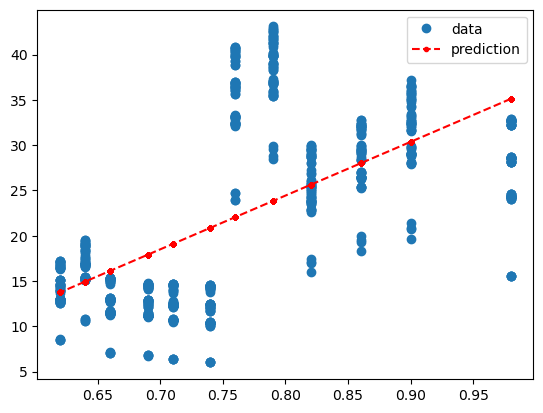

In [140]:
# Plot the regression
fig, ax = plt.subplots()
ax.plot(energ['Relative_Compactness'], energ['Heating_Load'],'o',label="data")
ax.plot(energ['Relative_Compactness'], res.fittedvalues,
        'r--.',label="prediction")
ax.legend(loc='best');

We now compute residues:

In [97]:
residues = energ['Heating_Load'] - res.predict(energ['Relative_Compactness'])  # Same as res.resid
print(residues)

0     -19.568857
1     -19.568857
2     -19.568857
3     -19.568857
4      -9.530135
         ...    
763     2.943212
764     2.790393
765     2.690393
766     2.730393
767     2.890393
Length: 768, dtype: float64


The sum of squared residuals (or residual sum of squares) is:

In [141]:
print(np.sum(res.resid**2), res.ssr)

47851.685456254534 47851.685456254534


## Several features in the linear regression model

We now define regression model with several features:

In [142]:
import statsmodels.formula.api as smf

model2 =  smf.ols('Heating_Load ~ Relative_Compactness + Wall_Area',data = energ)
res2 = model2.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Heating_Load   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     1095.
Date:                Thu, 26 Jan 2023   Prob (F-statistic):          2.86e-225
Time:                        00:02:29   Log-Likelihood:                -2345.5
No. Observations:                 768   AIC:                             4697.
Df Residuals:                     765   BIC:                             4711.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              -76.8474      2.144    -35.840      0.000     -81.057     -72.638
Relative_Compactness    71.1723      1.792     39.714      0.000      67.654      74.690
Wall_Area                0.1406      0.004     32.348      0.000       0.132       0.149
==============================================================================
Omnibus:                       42.711   Durbin-Watson:                   0.299
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               93.911
Skew:                           0.321   Prob(JB):                     4.05e-21
Kurtosis:                       4.588   Cond. No.                     4.57e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.57e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The sum of squared residuals (SSR) necessarily decreases as we add more features into the regression:

In [99]:
res2.ssr

20209.33700089095

The coefficients of the models are the following:

In [105]:
res2.params

Intercept              -76.847444
Relative_Compactness    71.172342
Wall_Area                0.140556
dtype: float64

> Check that this vector is equal to the Least Squares Estimator given in the slides of the lecture:
$$ \theta = (X'X)^{-1} X' Y  $$ 

In [ ]:
#### TO DO ####

You can includes categorical variables in the model using the `C()` operator:

In [102]:
model3 =  smf.ols('Heating_Load ~ Relative_Compactness + Wall_Area + C(Orientation)',data = energ)
res3 = model3.fit()
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Heating_Load   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     436.5
Date:                Wed, 25 Jan 2023   Prob (F-statistic):          7.56e-221
Time:                        22:40:06   Log-Likelihood:                -2345.4
No. Observations:                 768   AIC:                             4703.
Df Residuals:                     762   BIC:                             4731.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              -76.8418      2.172    -35.373      0.000     -81.106     -72.577
C(Orientation)[T.3]      0.0678      0.526      0.129      0.897      -0.964       1.100
C(Orientation)[T.4]     -0.0530      0.526     -0.101      0.920      -1.085       0.979
C(Orientation)[T.5]     -0.0375      0.526     -0.071      0.943      -1.069       0.994
Relative_Compactness    71.1723      1.796     39.638      0.000      67.648      74.697
Wall_Area                0.1406      0.004     32.285      0.000       0.132       0.149
==============================================================================
Omnibus:                       42.716   Durbin-Watson:                   0.299
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               93.926
Skew:                           0.321   Prob(JB):                     4.02e-21
Kurtosis:                       4.589   Cond. No.                     4.59e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.59e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
res3.ssr

20207.67002862531

##  Scikit-learn for linear regression

As we can see in the previous procedures, there are many statistical summaries and methods are provided by Statsmodels for the analysis of linear regression, although we have not really exploit these possibilties, by focusing on predictions.

The [scikit-learn library](https://scikit-learn.org/stable/index.html), which is totally dedicated to machine learning methods, obviously provides [linear regression methods](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) (without statistics). In the following of the labs, we will mainly use [scikit-learn library](https://scikit-learn.org/stable/index.html).

Procedures of scikit-learn generally require numpy arrays (not data frames).

In [143]:
from sklearn.linear_model import LinearRegression

data = energ.values # np array
X_features = data[:,0:6]
y = data[:,9]

reg = LinearRegression().fit(X_features, y)

reg.score(X_features, y)

0.8473614254253556

In [144]:
reg.coef_

array([-7.18119067e+01, -3.66694905e+12,  3.66694905e+12,  7.33389811e+12,
        4.27234650e+00,  1.18528388e-01])

In [145]:
reg.intercept_

104.33776041666667

In [146]:
reg.predict(X_features[1:3,0:6])

array([29.59977106, 29.71829944])

In [147]:
y[1:3]

array([21.33, 21.33])

## Exercice 

The [Wind Speed dataset](https://www.kaggle.com/datasets/fedesoriano/wind-speed-prediction-dataset?resource=download) contains 6574 instances of daily averaged responses from an array of 5 weather variables sensors embedded in a meteorological station. 

The dataset is also avaible [here](https://box.ec-nantes.fr/index.php/s/QHNiDYJZLCY3Pr5).

Propose a similar analysis for the Wind Speed Dataset : exploratory statistics, and then linear regression to predict the Wind Speed Variable.

In [ ]:
#### TO DO ####